In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.set(rc={'figure.figsize':(15.7,12.27)})


In [4]:
UTILS = '/Users/krishnakalyan3/Educational/PumpIt/code/'
import sys
sys.path.append(UTILS)

In [5]:
# Custom imports
from utils import read_data
from utils import write_data
from param_config import config

In [13]:
# Train Data
train_x = read_data(config.d_xtrain)
train_y = read_data(config.d_ytrain)

In [15]:
train_x.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,missing_public_meeting,missing_scheme_management,missing_scheme_name,missing_permit,total_missing,year,month,day,day_week,kmeans_lat_long
0,0.0,287,1858,1373,342,30.770440,-3.535324,35182,0,3,...,0,0,1,0,1,2013,1,30,2,9
1,0.0,348,28,1120,79,36.979469,-3.347928,5624,0,5,...,0,0,0,0,0,2013,4,3,2,5
2,250.0,295,1291,1409,1418,29.936235,-4.422470,25543,0,3,...,0,0,0,0,0,2013,2,7,3,9
3,0.0,284,468,306,556,38.979287,-10.826676,1262,0,7,...,0,0,1,0,1,2013,1,27,6,6
4,0.0,110,573,0,671,31.732534,-2.436331,38114,0,4,...,0,0,1,0,1,2011,7,12,1,3


In [18]:
corr = train_x.corr()

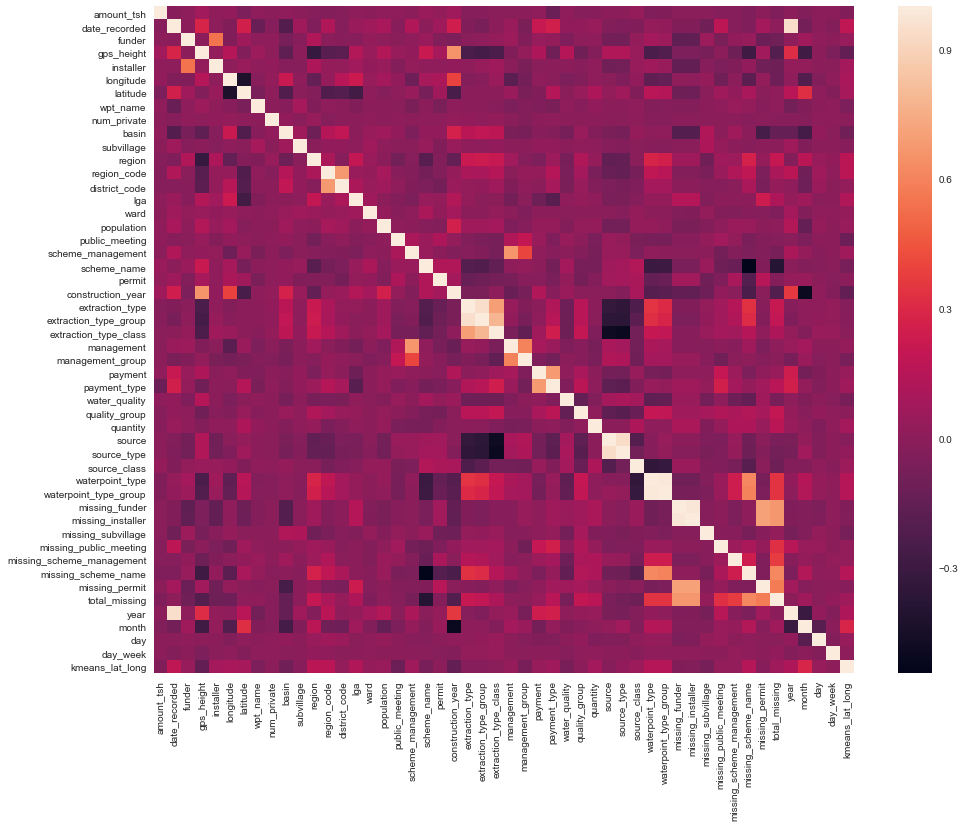

In [23]:
ax = sns.heatmap(corr)

In [25]:
train_x.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'missing_funder',
       'missing_installer', 'missing_subvillage', 'missing_public_meeting',
       'missing_scheme_management', 'missing_scheme_name', 'missing_permit',
       'total_missing', 'year', 'month', 'day', 'day_week', 'kmeans_lat_long'],
      dtype='object')

In [29]:
from scipy.stats import chi2_contingency

# Chi square test to check if varibles are independent
select_cols = ['region', 'region_code']
chi2, p, dof, expected =  chi2_contingency(train_x[select_cols])

In [32]:
chi2, p

(294776.25399509666, 0.0)

In [34]:
select_cols = ['month', 'construction_year']
chi2, p, dof, expected =  chi2_contingency(train_x[select_cols])

In [36]:
chi2, p

(39817835.198553778, 0.0)